In [1]:
import gymnasium as gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('MountainCarContinuous-v0', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self, seed=None, options=None):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, truncated, info = self.env.step(action)

        reward = -1.0
        if done:
            reward = 100

        self.step_n += 1
        if self.step_n >= 400:
            done = True

        return state, reward, done, truncated, info


env = MyWrapper()

env.reset()

array([-0.58140653,  0.        ], dtype=float32)

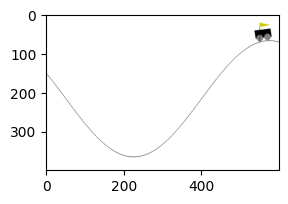

In [53]:
from matplotlib import pyplot as plt

%matplotlib inline

#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [44]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, truncated, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('truncated=', truncated)
    print('info=', info)


test_env()

env.observation_space= Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
env.action_space= Box(-1.0, 1.0, (1,), float32)
state= [-0.4936689  0.       ]
action= [0.29775187]
next_state= [-4.9344644e-01  2.2245530e-04]
reward= -1.0
done= False
truncated= False
info= {}


In [45]:
from stable_baselines3 import DDPG
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = DDPG(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    buffer_size=10_10000,  #replay_buff_size
    learning_starts=100,  #从N步以后开始训练
    batch_size=100,  #一次采样数据量
    tau=0.005,  #target网络每次软更新量
    gamma=0.9,
    train_freq=(20, 'step'),  #训练频率
    verbose=0)

model

In [46]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

C:\ProgramData\miniconda3\envs\RoadNetOpt\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-400.0, 0.0)

In [47]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/6.DDPG.Mountain Car Continuous')

In [48]:
#加载模型
model = DDPG.load('save/6.DDPG.Mountain Car Continuous')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

C:\ProgramData\miniconda3\envs\RoadNetOpt\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
C:\ProgramData\miniconda3\envs\RoadNetOpt\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(


(32.75, 0.9937303457175896)

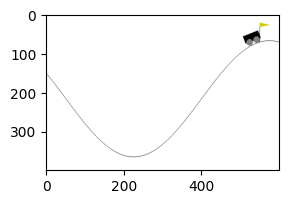

34.0 67 [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 100]


In [54]:
from IPython import display


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, truncated, info = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()